<center><h1> Projeto 2 - Ciência dos Dados</h1><center>

## Insper Instituto de Ensino e Pesquisa

<center><h5>Autores:
</h5></center>

<center><h5>Nome: Arthur Motta Gomes
</h5></center>

<center><h5>Nome: Enzo Dadier Lacks Zamberlan
</h5></center>

<center><h5>Nome: Guilherme Fugita
</h5></center>


**Professora Orientadora:**

Maria Kelly Venezuela 

## Contextualização

------------------------------------------------------------

<div id="context"></div>

   As brincadeiras típicas da infância como, por exemplo, pular cordas, queimadas e pique-pegas estão, lamentavelmente, sendo reduzidas das vidas dos jovens na atualidade. Entretanto, os jogos eletrônicos estão a cada vez mais presentes, segundo o estudo do Pew Internet & American Life Project, em 2015, nos Estados Unidos, 80% dos jovens entre 10 e 17 anos jogavam videogames diariamente.
   
   O fascínio pela tecnologia, que sempre surpreende com novidades, é uma das causas pelas quais os jovens são tão vidrados nos jogos eletrônicos. Ademais, o pais ,geralmente, incentivam esses jogos por preferirem que os filhos fiquem em casa devido à violência das ruas. Dessa forma, é comum que crianças e adolescentes passem horas vidrados nos computadores e celulares. Além disso, os jogos via internet permitem que passem o dia inteiro em contato com seus colegas, já que nem todos têm a oportunidade de saírem de casa para se encontrarem. E o sedentarismo também é uma das causas da preferência de jogos onlines a jogos que necessitem de movimentos físicos.
    
   Os efeitos causados pelos jogos eletrônicos podem ser bastante positivos quando esses são usados moderadamente. Um deles é o fato de esses tipo de jogo desenvolver habilidades como, por exemplo, a destreza, a percepção e  induzir o raciocínio lógico. 
   
   **Nesse sentido, o objetivo desse projeto é classificar e tentar prever, atraves das características dos games ao longo dos anos (plataforma , data de lancamento, meta score, entre outros), se determinado jogo será aceito e fará sucesso futuramente, prevendo a sua plataforma de publicação e nota.**

### Entendendo a base de dados utilizada
<div id="Base"></div>

* `name`: Nome do Jogo;


* `platform`: Plataforma em que o jogo foi lançado, de consoles à computador;


* `release_date	`: Data de lançamento do jogo; 


* `summary`: Um breve resumo do jogo e sua história;
     

* `meta_score (Target)`: Uma média das notas dadas pelos críticos de jogos indo de 00 à 100;


* `user_review`: Uma média das notas dadas pelos usuários indo de 0 à 10.



## Bibliotecas

------------------------------------------------------------

<div id="bibliotecas"></div>

_Rode a célula centralizar e melhorar a visibilidade do Notebook_

In [2]:
# Possibilitando escrever no Markdown através de código.
from IPython.display import Markdown as md

#Ajeitando gráficos para ficarem centralizados
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#Ignorando avisos de limite
import warnings

warnings.filterwarnings('ignore')

In [64]:
# Bibliotecas essenciais

# Bibliotecas essenciais

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

# Modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

#Validação cruzada
from sklearn.model_selection import cross_val_score

## Carregando Base de Dados

---------------------------------------------------------------

<div id="carregando"></div>

In [5]:
filename = 'all_games.csv'

In [6]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\arthu\CDADOS\PROJETO2\Projeto_2_CDADOS


In [7]:
dataset = pd.read_csv(filename)
dataset.head(5)

name        platform        release_date  \
0  The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23, 1998   
1              Tony Hawk's Pro Skater 2     PlayStation  September 20, 2000   
2                   Grand Theft Auto IV   PlayStation 3      April 29, 2008   
3                           SoulCalibur       Dreamcast   September 8, 1999   
4                   Grand Theft Auto IV        Xbox 360      April 29, 2008   

                                             summary  meta_score user_review  
0  As a young boy, Link is tricked by Ganondorf, ...          99         9.1  
1  As most major publishers' development efforts ...          98         7.4  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...          98         7.7  
3  This is a tale of souls and swords, transcendi...          98         8.4  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...          98         7.9

In [8]:
#Informações gerais sobre a base de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


# Verificando o tamanho do DATASET:

Aqui verificaremos o tamanho do dataset, ainda sem descontar suas linhas que possuem valores nulos e sem valores.

In [9]:
dataset.shape

(18800, 6)

# Para verificar valores nulos:

Utilizaremos o .insull() para verificar se há valores nulos no nosso dataset, sendo assim faremos a somas desses valores nulos pelo código .sum(). Com isso nós iremos transformar os valores nulos em "NaN", ou seja, *"Not a Number"*, para logo em seguida eliminá-los criando enfim um dataset limpo e sem valores nulos.

In [10]:
dataset.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [11]:
nan_value = float("NaN")
data_clean = dataset
data_clean.replace("", nan_value, inplace=True)
# data_clean.summary = data_clean.summary.fillna('SEM RESUMO', inplace=True)
data_clean.summary = data_clean.summary.replace(np.nan, 'SEM RESUMO', regex=True)

# data_clean.dropna(inplace=True)

In [12]:
data_clean.isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [13]:
data_clean.shape

(18800, 6)

# Identificando a categoria de cada elemento utilizado e transformando-os caso necessário:

In [14]:
data_clean.dtypes

name            object
platform        object
release_date    object
summary         object
meta_score       int64
user_review     object
dtype: object

In [15]:
data_clean.user_review = pd.to_numeric(data_clean.user_review, errors='coerce').fillna(0).astype(np.float)

In [16]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
dtype: object

# A partir desse momento iniciaremos nossa análise exploratória do problema apresentado pelo grupo:

-------------------------------------------------------------


Tendo em vista o anseio por saber qual será a plataforma de publicação do próximo jogo de sucesso e sua respectiva nota atribuída, vamos à seguinte exploração de dados:

In [17]:
dados_meta_score = data_clean.drop(['name','platform','release_date','summary','user_review'], axis=1)
dados_meta_score.describe().round(3)

meta_score
count   18800.000
mean       70.649
std        12.225
min        20.000
25%        64.000
50%        72.000
75%        80.000
max        99.000

In [18]:
dados_user_review = data_clean.drop(['name','platform','release_date','summary','meta_score'], axis=1)
dados_user_review.describe().round(3)

user_review
count    18800.000
mean         6.483
std          2.233
min          0.000
25%          6.000
50%          7.200
75%          7.900
max          9.700

_Observe que aqui teremos todos os consoles e videogames envolvidos no nosso pdSeries_

In [19]:
data_clean.drop(['name','release_date','summary','user_review','meta_score'], axis=1).groupby(data_clean.platform).describe().round(3)

platform                                
                     count unique                top  freq
platform                                                  
 3DS                   396      1                3DS   396
 DS                    720      1                 DS   720
 Dreamcast             125      1          Dreamcast   125
 Game Boy Advance      438      1   Game Boy Advance   438
 GameCube              448      1           GameCube   448
 Nintendo 64            71      1        Nintendo 64    71
 PC                   4864      1                 PC  4864
 PSP                   512      1                PSP   512
 PlayStation           187      1        PlayStation   187
 PlayStation 2        1414      1      PlayStation 2  1414
 PlayStation 3        1256      1      PlayStation 3  1256
 PlayStation 4        2056      1      PlayStation 4  2056
 PlayStation 5         124      1      PlayStation 5   124
 PlayStation Vita      257      1   PlayStation Vita   257
 Stadia                  5      1             Stadia     5
 Switch               1399      1             Switch  1399
 Wii                   655      1                Wii   655
 Wii U                 184      1              Wii U   184
 Xbox                  789      1               Xbox   789
 Xbox 360             1644      1           Xbox 360  1644
 Xbox One             1179      1           Xbox One  1179
 Xbox Series X          77      1      Xbox Series X    77

# Para facilitar a compreensão do projeto vamos juntar os respectivos equipamentos com suas empresas de origem!

Para isso adicionamos os respectvios aparelhos à sua empresa de origem. Vale notar aqui que todos os nomes no pdSeries possuem um espaço antes de começarem (e que o Game Boy Advance possui uma quebra de parágrafo), fato que foi adicionado aos respectivos nomes também.

In [20]:
data_clean.platform[0] == ' Nintendo 64' # Valida a entrada dos nomes 

True

In [21]:
data_clean.platform[53] == ' Game Boy Advance' # Valida a entrada dos nomes 

True

In [22]:
empresa = []
lista_nintendo = [' 3DS',' DS',' Dreamcast',' Game Boy Advance',' GameCube',' Nintendo 64',' Switch',' Wii',' Wii U']
lista_playstation = [' PSP', ' PlayStation',' PlayStation 2',' PlayStation 3',' PlayStation 4',' PlayStation 5',' PlayStation Vita' ]
lista_pc = [' PC',' Stadia']
lista_xbox = [' Xbox', ' Xbox 360', ' Xbox One', ' Xbox Series X']
for s in data_clean.platform:
    if s in lista_nintendo:
        empresa.append('Nintendo')
    if s in lista_playstation:
        empresa.append('PlayStation')
    if s in lista_pc:
        empresa.append('PC')
    if s in lista_xbox:
        empresa.append('Xbox')
#     if s not in lista_nintendo and s not in lista_playstation and s not in lista_pc and s not in lista_xbox: 
#         empresa.append('oq?')
    
        
data_clean['empresa'] = empresa

data_clean

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1      September 20, 2000  As most major publishers' development efforts ...   
2          April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3       September 8, 1999  This is a tale of souls and swords, transcendi...   
4          April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
...                   ...                                                ...   
18795        May 21, 2013  Fast & Furious: Showdown takes some of the fra...   
18796    November 3, 2003  Drake is out for revenge in a supernatural Hon...   
18797  September 22, 2015  Head out on a journey of redemption, driven by...   
18798    October 15, 2012  (Formerly known as "The War Z") It has been 5 ...   
18799      March 31, 2009  The Leisure Suit Larry: Box Office Bust video ...   

       meta_score  user_review      empresa  
0              99          9.1     Nintendo  
1              98          7.4  PlayStation  
2              98          7.7  PlayStation  
3              98          8.4     Nintendo  
4              98          7.9         Xbox  
...           ...          ...          ...  
18795          22          1.3         Xbox  
18796          22          1.7         Xbox  
18797          21          2.9  PlayStation  
18798          20          1.7           PC  
18799          20          2.0           PC  

[18800 rows x 7 columns]

In [23]:
data_clean.drop(['name','release_date','summary','user_review','meta_score','platform'], axis=1).groupby(data_clean.empresa).describe().round(3)

empresa                          
              count unique          top  freq
empresa                                      
Nintendo       4436      1     Nintendo  4436
PC             4869      1           PC  4869
PlayStation    5806      1  PlayStation  5806
Xbox           3689      1         Xbox  3689

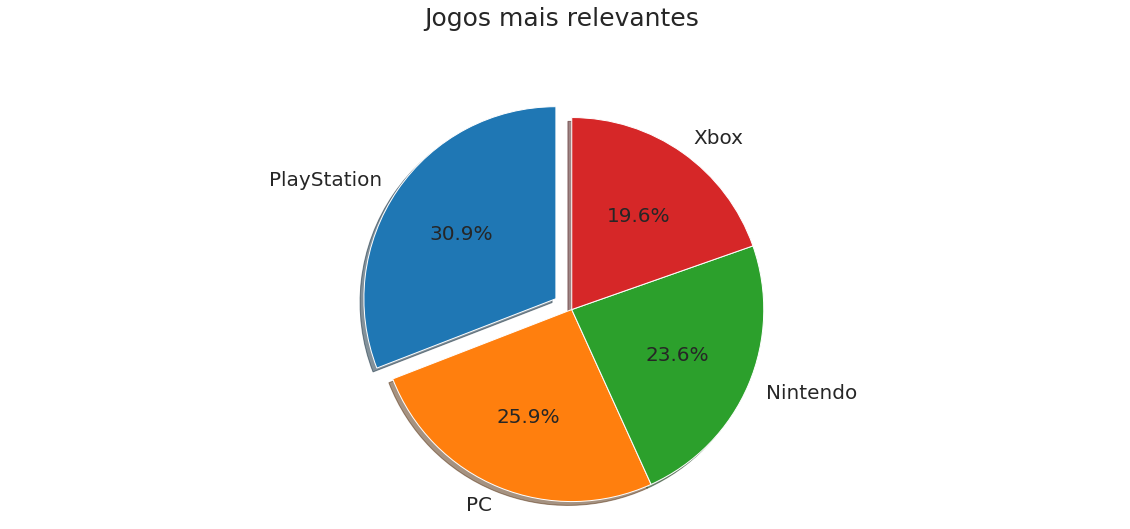

In [24]:
# Setando cores de fundo - gráficos
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.title('Jogos mais relevantes \n\n',size=25)
plt.pie(data_clean.empresa.value_counts(),labels=data_clean.empresa.value_counts().index,
        explode= [0.1,0,0,0],autopct='%1.1f%%',shadow=True, startangle=90,
       textprops={'size':20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('default')
plt.show()

# Criando um modelo primário (teste e impróprio) que prevê a nota dada por um certo meta score, a partir das avaliações feitas pelos usuários:

In [25]:
x_dados = data_clean['user_review']*10 # Definindo user_review como explicativa e multiplicando por 10 para equiparar as casas
# decimais.
y_dados = data_clean['meta_score']  # Definindo meta_score como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

In [26]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4166.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:58:43   Log-Likelihood:                -71859.
No. Observations:               18800   AIC:                         1.437e+05
Df Residuals:                   18798   BIC:                         1.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5293      0.248    224.130      0.000      55.044      56.015
user_review     0.2332      0.004     64.543      0.000       0.226       0.240
==============================================================================
Omnibus:                     1285.840   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1581.545
Skew:                          -0.666   Prob(JB):                         0.00
Kurtosis:                       3.495   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**AGORA USE A SAIDA do OLS Regression Results**

Como resultado do `statsmodels.OLS` obtivemos a tabela acima, com informações de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `2010_income`). Esses valores podem ser encontrados na coluna `coef` do *output* do OLS Regression Results.

In [27]:
beta0 = results.params['const']
beta1 = results.params['user_review']

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))

Estimativa de beta0 (coeficente linear): 55.529330699701575
Estimativa de beta1 (coeficente angular): 0.2332088854330478


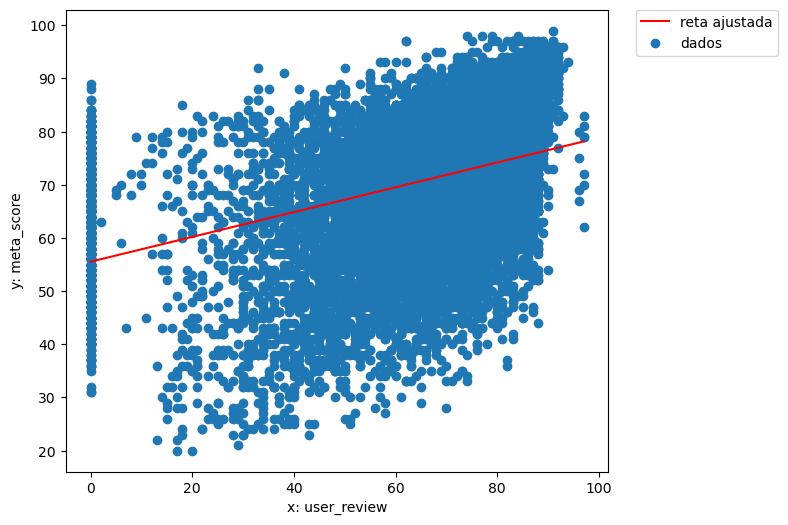

In [28]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 100000)
y_vec = beta0 + beta1*x_vec

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: user_review")
plt.ylabel("y: meta_score")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Agora vamos criar um novo modelo, adicionando os anos de lançamento como parâmetro de comparação entre os jogos lançados:

Primeiro vamos identificar o ano obtido em `release_date`:

In [29]:
data_clean.release_date[834].split(',')[1].strip() # Valida se a data é retirada

'2017'

Vamos identificar o tamanho dessa coluna:

In [30]:
range(len(data_clean.release_date))

range(0, 18800)

Agora adicionaremo seus respectivos anos a uma lista, para posteriormente adicioná-la ao `DataFrame`:

In [31]:
anos = []

for s in range(len(data_clean.release_date)):
    anos.append (data_clean.release_date[s].split(',')[1].strip())
        

In [32]:
data_clean.head(834)

name        platform        release_date  \
0    The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23, 1998   
1                Tony Hawk's Pro Skater 2     PlayStation  September 20, 2000   
2                     Grand Theft Auto IV   PlayStation 3      April 29, 2008   
3                             SoulCalibur       Dreamcast   September 8, 1999   
4                     Grand Theft Auto IV        Xbox 360      April 29, 2008   
..                                    ...             ...                 ...   
829                                XCOM 2              PC    February 5, 2016   
830                          Dishonored 2   PlayStation 4   November 10, 2016   
831          Tony Hawk's Pro Skater 1 + 2        Xbox One   September 4, 2020   
832           What Remains of Edith Finch          Switch        July 4, 2019   
833        Injustice 2: Legendary Edition   PlayStation 4      March 27, 2018   

                                               summary  meta_score  \
0    As a young boy, Link is tricked by Ganondorf, ...          99   
1    As most major publishers' development efforts ...          98   
2    [Metacritic's 2008 PS3 Game of the Year; Also ...          98   
3    This is a tale of souls and swords, transcendi...          98   
4    [Metacritic's 2008 Xbox 360 Game of the Year; ...          98   
..                                                 ...         ...   
829  20 years have passed since world leaders uncon...          88   
830  Dishonored 2 takes your protagonist, Corvo Att...          88   
831  Drop back in with the most iconic skateboardin...          88   
832  What Remains of Edith Finch is a collection of...          88   
833                                         SEM RESUMO          88   

     user_review      empresa  
0            9.1     Nintendo  
1            7.4  PlayStation  
2            7.7  PlayStation  
3            8.4     Nintendo  
4            7.9         Xbox  
..           ...          ...  
829          7.3           PC  
830          8.0  PlayStation  
831          7.9         Xbox  
832          7.8     Nintendo  
833          7.6  PlayStation  

[834 rows x 7 columns]

In [33]:
data_clean

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1      September 20, 2000  As most major publishers' development efforts ...   
2          April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3       September 8, 1999  This is a tale of souls and swords, transcendi...   
4          April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
...                   ...                                                ...   
18795        May 21, 2013  Fast & Furious: Showdown takes some of the fra...   
18796    November 3, 2003  Drake is out for revenge in a supernatural Hon...   
18797  September 22, 2015  Head out on a journey of redemption, driven by...   
18798    October 15, 2012  (Formerly known as "The War Z") It has been 5 ...   
18799      March 31, 2009  The Leisure Suit Larry: Box Office Bust video ...   

       meta_score  user_review      empresa  
0              99          9.1     Nintendo  
1              98          7.4  PlayStation  
2              98          7.7  PlayStation  
3              98          8.4     Nintendo  
4              98          7.9         Xbox  
...           ...          ...          ...  
18795          22          1.3         Xbox  
18796          22          1.7         Xbox  
18797          21          2.9  PlayStation  
18798          20          1.7           PC  
18799          20          2.0           PC  

[18800 rows x 7 columns]

In [34]:
data_clean['ano'] = anos
data_clean

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1      September 20, 2000  As most major publishers' development efforts ...   
2          April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3       September 8, 1999  This is a tale of souls and swords, transcendi...   
4          April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
...                   ...                                                ...   
18795        May 21, 2013  Fast & Furious: Showdown takes some of the fra...   
18796    November 3, 2003  Drake is out for revenge in a supernatural Hon...   
18797  September 22, 2015  Head out on a journey of redemption, driven by...   
18798    October 15, 2012  (Formerly known as "The War Z") It has been 5 ...   
18799      March 31, 2009  The Leisure Suit Larry: Box Office Bust video ...   

       meta_score  user_review      empresa   ano  
0              99          9.1     Nintendo  1998  
1              98          7.4  PlayStation  2000  
2              98          7.7  PlayStation  2008  
3              98          8.4     Nintendo  1999  
4              98          7.9         Xbox  2008  
...           ...          ...          ...   ...  
18795          22          1.3         Xbox  2013  
18796          22          1.7         Xbox  2003  
18797          21          2.9  PlayStation  2015  
18798          20          1.7           PC  2012  
18799          20          2.0           PC  2009  

[18800 rows x 8 columns]

Vamos verificar o tipo de categoria dada ao `ano` e caso necessário vamos mudá-la:

In [35]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
empresa          object
ano              object
dtype: object

In [36]:
data_clean.ano = pd.to_numeric(data_clean.ano, errors='coerce').fillna(0).astype(np.int64)

In [37]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
empresa          object
ano               int64
dtype: object

In [38]:
data_clean

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1      September 20, 2000  As most major publishers' development efforts ...   
2          April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3       September 8, 1999  This is a tale of souls and swords, transcendi...   
4          April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
...                   ...                                                ...   
18795        May 21, 2013  Fast & Furious: Showdown takes some of the fra...   
18796    November 3, 2003  Drake is out for revenge in a supernatural Hon...   
18797  September 22, 2015  Head out on a journey of redemption, driven by...   
18798    October 15, 2012  (Formerly known as "The War Z") It has been 5 ...   
18799      March 31, 2009  The Leisure Suit Larry: Box Office Bust video ...   

       meta_score  user_review      empresa   ano  
0              99          9.1     Nintendo  1998  
1              98          7.4  PlayStation  2000  
2              98          7.7  PlayStation  2008  
3              98          8.4     Nintendo  1999  
4              98          7.9         Xbox  2008  
...           ...          ...          ...   ...  
18795          22          1.3         Xbox  2013  
18796          22          1.7         Xbox  2003  
18797          21          2.9  PlayStation  2015  
18798          20          1.7           PC  2012  
18799          20          2.0           PC  2009  

[18800 rows x 8 columns]

#  Para podermos fazer uma análise exploratória mais profunda e completa, projetaremos gráficos em função dos anos para as notas dadas aos jogos!

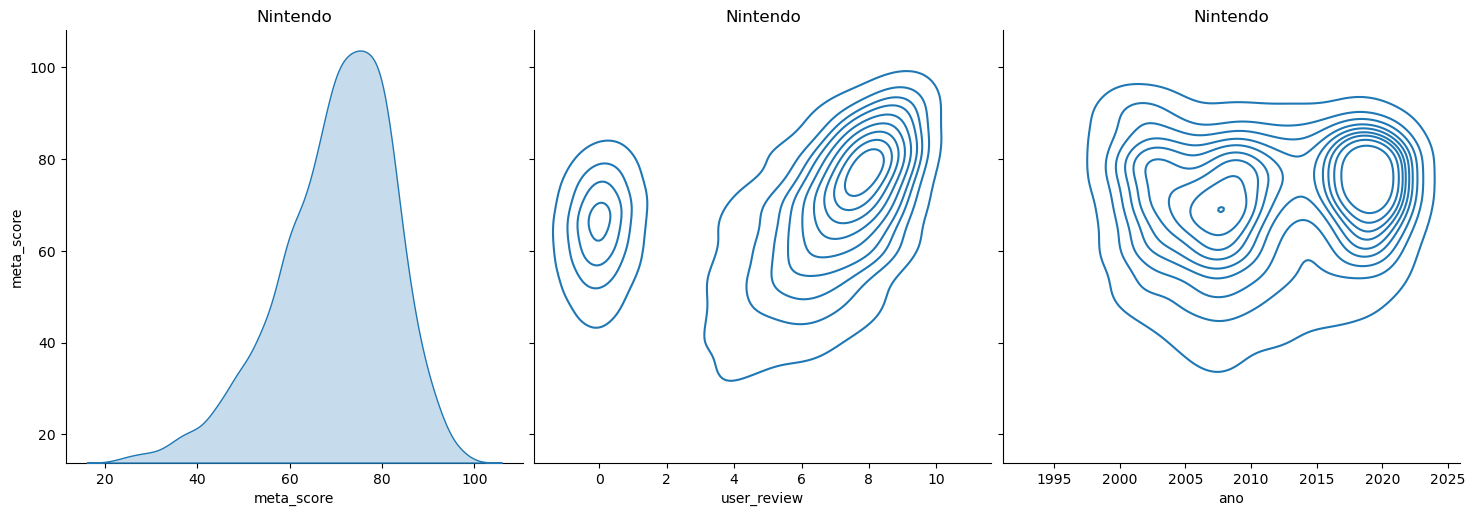

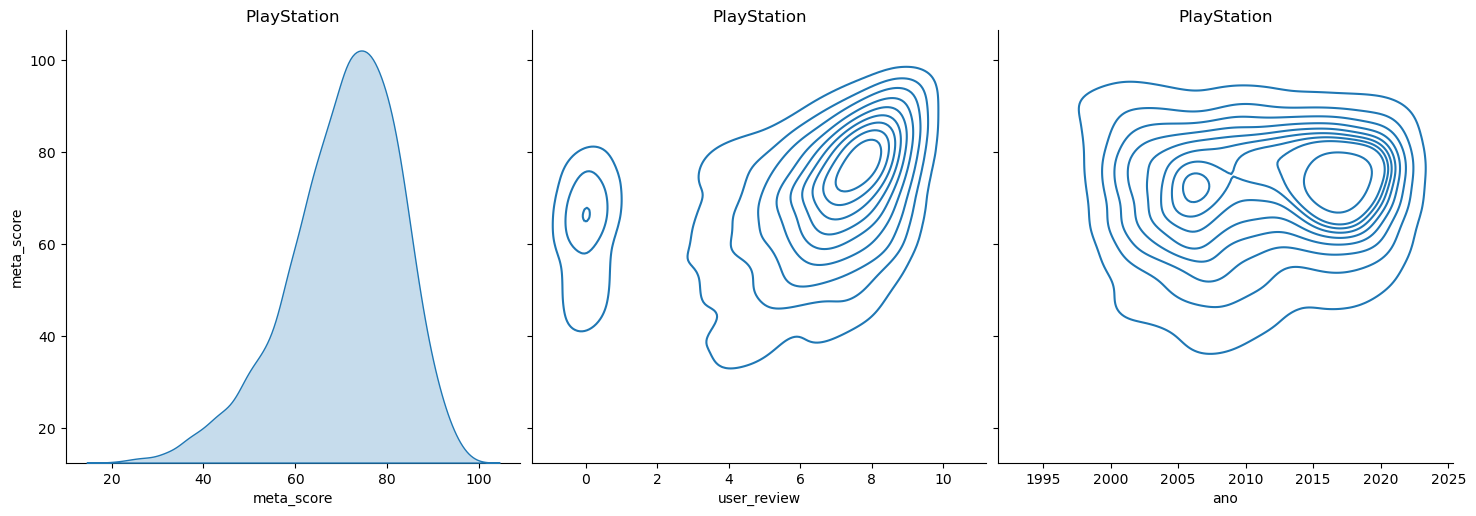

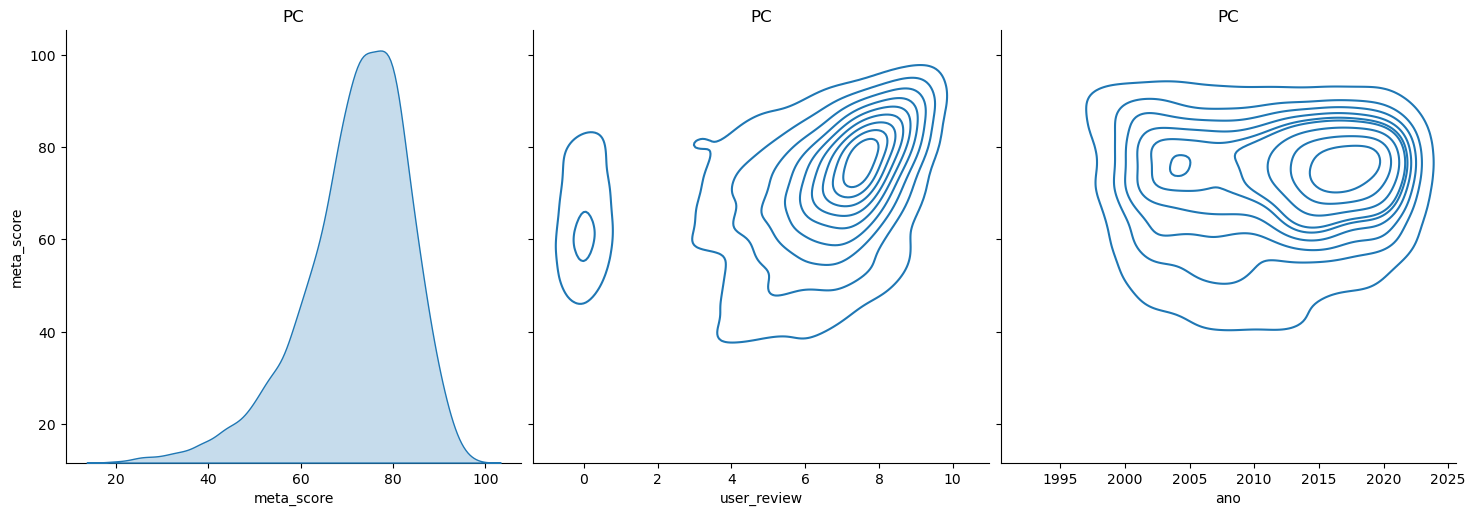

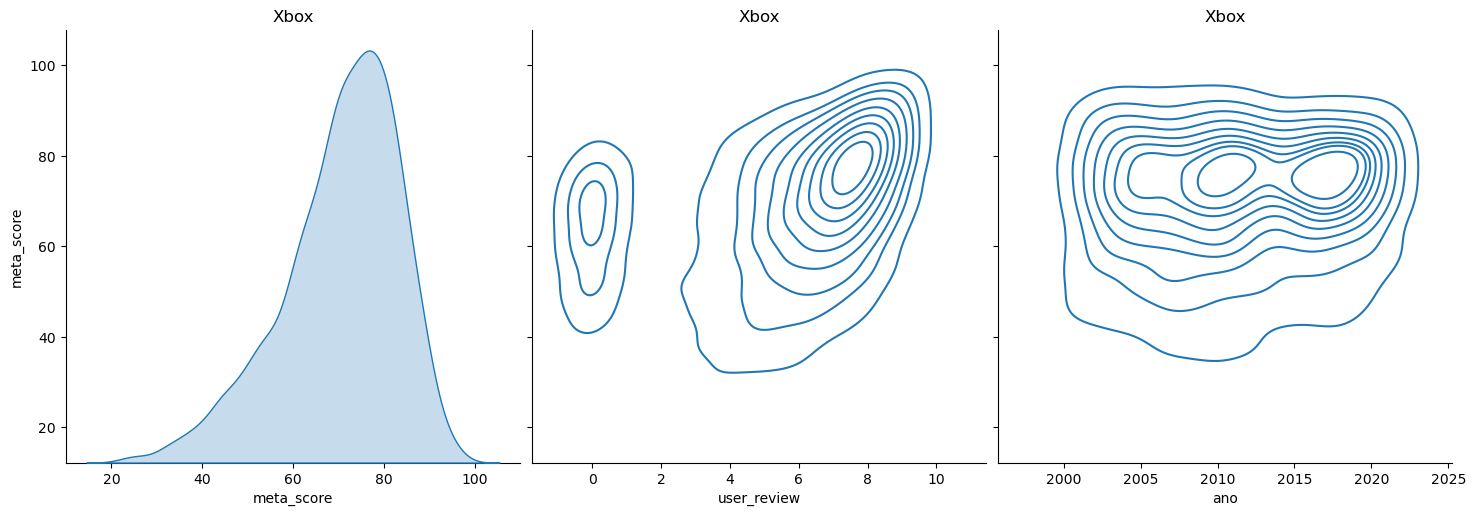

In [39]:
# plt.subplot(411)
sns.pairplot(data=data_clean[data_clean.empresa=='Nintendo'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='Nintendo')

# plt.subplot(412)
# plt.title("PlayStation")
sns.pairplot(data=data_clean[data_clean.empresa=='PlayStation'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='PlayStation')

# plt.subplot(413)
# plt.title("PC")
sns.pairplot(data=data_clean[data_clean.empresa=='PC'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='PC')

# plt.subplot(414)
# plt.title("Xbox")
sns.pairplot(data=data_clean[data_clean.empresa=='Xbox'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='Xbox')



## Concluindo Analise Exploratória

<div id="conclusao1"></div> 

Conforme retiramos das analises gráficas e analíticas feitas , é valido sintetizar alguns pontos chaves , para melhor entendimento da base de dados e da pergunta que queremos responder.

**A base de dados está limpa e não possui valores nulos, ou algum dado fora dos conformes (Outliers notórios) , como por exemplo bytes negativos ou uma porta sem identificação numérica.**

Fora averiguado também que a maior parte dos dados numéricos, teve comportamento modelado por uma distribuição estatística do tipo **Exponencial**,sendo esta  uma distribuição que se caracteriza por ter uma função de taxa de falha constante. A distribuição exponencial é a única com esta propriedade. Ela é considerada uma das mais simples em termos matemáticos, mostrando também uma clara assimetria em alguns desses dados armazenados, representando sobretudo a maior concentração de dados nos expoentes até a centena.

Dessa maneira segmentou-se os fatores mais importantes de acordo com os protocolos de ação do Firewall:

* **Allow (Permissão de conexão Client-Server):**

    `Source Port Client`: Notou-se um grande número de portas no intervalo das portas consideradas de interface Web, isto é as portas disponíveis a Browsers ou desenvolvedores, demonstrando assim, que um Software de detecção de Malware, deve estar sujeito principalmente a permissão de tráfego.
    
    `Destination Port Client`: As ações liberadas por protocolo, se restringiram praticamente as portas 53, 80 e 443, estas sendo Well-Known Ports, o que justifica o fato de estas ações passarem pelo crivo de portas registradas e conhecidas pelo sistema.
    
    `Source Port NAT`: Quase não houveram ações de permissão destinadas a esse protocolo, muito por conta da tradução do endereço de rede não se aplicar, em muitos casos, a portas de desenvolvedores.
    
    `Destination Port NAT`: As ações liberadas por protocolo, se restringiram praticamente as portas 53, 80 e 443, estas sendo Well-Known Ports, o que justifica o fato de estas ações passarem pelo crivo de portas registradas e conhecidas pelo sistema, muito parecido com o protocolo realizado pela inteiração Cliente.
    
    `Bytes`: Retomando a analise feita [aqui](#Numerico) , fora observado que a maior parte dos Bytes trafegados, mais concentrados principalmente nos Recebidos, foram do domínio do protocolo de permissão, o que se justifica, devido o não impedimento de conexão realizado pelo Firewall, permitindo o tráfego dos dados entre Client e Server.
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste, em basicamente o "empilhamento" de bytes trafegados de maneiras simultaneamente pelo endereço de rede.
    `Tempo decorrido`: Como mais Bytes e Packets foram realizados por esse protocolo, o tempo de duração de uma análise por vezes foi maior, visando sobretudo a verificação da conexão.
    
    
* **Deny (Negação de conexão Client-Server):**

    `Source Port Client`: Notou-se um grande número de portas no intervalo das portas consideradas de interface Web, isto é as portas disponíveis a Browsers ou desenvolvedores, com demonstração principal de que possíveis ameaças podem estar localizadas em portas não conhecidas ou registradas, e sim na parte aberta a desenvolvedores Web.
    
    `Destination Port Client`: As ações de Deny, foram quase que exclusivas e bem divididas nas portas de open Source a Desenvolvedores, seguindo à métrica dessas portas conforme descrito.
    
    `Source Port NAT`: Como as maiorias das ações tomadas nesse endereço foram majoritariamente na porta 0, e dentre essas, a ação de deny foi a mais proeminente, mostrando um possível padrão observável nesse certame.
    
    `Destination Port NAT`: Fora observado para o protocolo Deny na porta de destinação de endereço de rede, a porta mais notória nesse sentido, foi  novamente a porta de número 0, indicando um protocolo universal para tais ações sobre este protocolo.
    
    `Bytes`: Averiguou-se que devido a natureza deste protocolo, a maioria dos Bytes em tráfego foram aqueles que foram enviados, devido que ao bloqueio realizado pelo software, devido a detecção de Malware.
    
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste em um conglomerado de bytes e estando restrito a esse sentido.
    
    `Tempo decorrido`: O tempo decorrido foi praticamente padronizado para ações que não a de "Allow", devido a tomada de decisão mais rápida do software após detecção de Malware.
    
* **Drop (Desligamento simultâneo de interface Client-Server)**:

    `Source Port Client`: Quase não observou-se este protocolo na inteiração Cliente-Server, demonstrando a possibilidade de ativação deste em casos mais específicos de envio de dados do Servidor para o cliente e não o contrário.
    
    `Destination Port Client`: Tem proeminência na porta 445 de destinação, ressaltando que possivelmente ações danosas podem estar associadas a essa porta e sendo esta responsável pela maioria dos casos de desligamento simultâneo.
    
    `Source Port NAT`: Teve a maioria das ações tomadas pela porta 0, quase que como ação protocolar, deixando dessa forma, a ação de Drop como a segunda mais comum nessa porta.
    
    `Destination Port NAT`: Fora repetido o comportamento observado no protocolo anterior, sendo a ação de Drop a segunda mais comum  na porta 0, a mais proeminente em ocorrências nesse âmbito.
    
    `Bytes`: Averiguou-se que devido a natureza deste protocolo, a maioria dos Bytes em tráfego foram aqueles que foram enviados, devido que ao bloqueio realizado pelo software, devido a detecção de Malware.
    
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste em um conglomerado de bytes e estando restrito a esse sentido.
    
    `Tempo decorrido`: O tempo decorrido foi praticamente padronizado para ações que não a de "Allow", devido a tomada de decisão mais rápida do software após detecção de Malware.

* **Reset-Both (Resetar simultâneamente a interface) :**

     Não foram Observados dados suficientes para mapeamento do comportamento dos features em função dessa ação, devido a sua pequena ocorrência no Dataset.
        
Esses fatos observados nos features numéricos, reforçam a necessidade de uma normaliazção de valores utilizada , logarítimica.

Seguimentando esses dados pela ação tomada , observou-se que os protocolos drop , denny e reset-both , os dados enviados bytes/packets foram feitos de maneira quase que unidirecional (Interface Client-Server), visto que o Firewall barrou o recebimento de dados dessa porta, corraborando para sua função de proteção do sistema.

Por outro lado , assim como esperado , aqueles que receberam protocolo allow tiveram recebimento e envio de dados de maneira bidirecional, devido a permissão do Firewall. Como esperado , as operações no protocolo Allow , demoraram mais tempo do que nas outras ações , devido a troca de dados realizada.

# Tendo em vista o nosso objetivo de previsão, agora, vamos embaralhar o dataset a fim de possuir valores de teste e valores de comparção para uso futuro!

Analisando os tipos de dados contidos em nosso dataset, observamos que para o modelo preditivo alguns valores enquadram-se na característica de uma dados categórico. Para relembrar:

* `Dados qualitativos ou categóricos` são aqueles  e ao serem transformados em valores numéricos não possuem uma lógica ou sentido agregado. Por exmeplo as cores dos olhos, não dizemos que a cor de olho castanho é maior que a cor de olhos azul.  

* `Dados quantitativos ou numericos` são aqueles que de certa forma impõem ordem. Por exemplo a idade ou altura de uma pessoa.

Dito isto , vamos analisar novamente os tipos de dados contidos em nossa base de dados:

`Vamos embaralhar o dataset para dividi-lo em duas frentes, mas claro pensando em seu nível de relevância e probabilidade, por isso utilizaremos a biblioteca sk.learning para facilitar o processo`:

In [40]:
train, test = train_test_split(
...     data_clean, test_size=0.2, random_state=42)

train

name           platform  \
17616       Monster 4x4: Masters of Metal                 PC   
15153                 J-Stars Victory Vs+      PlayStation 4   
10628                      Fractured Soul                3DS   
1123                         Dead Space 2                 PC   
14673            Kao the Kangaroo Round 2               Xbox   
...                                   ...                ...   
11284                         Herdy Gerdy      PlayStation 2   
11964   Mega Man Battle Network 4 Red Sun   Game Boy Advance   
5390          inFamous: Festival of Blood      PlayStation 3   
860                             Deathloop      PlayStation 5   
15795  Tom Clancy's Rainbow Six: Lockdown                 PC   

             release_date                                            summary  \
17616   December 10, 2003  Get ready to pilot the world's most powerful t...   
15153       June 30, 2015  J-STARS Victory Vs+ invites fans and gamers to...   
10628  September 13, 2012  In Fractured Soul 3D, players take on the role...   
1123     January 25, 2011  Hero Isaac Clarke returns for another heart-po...   
14673      March 21, 2006  Kao the kangaroo is on the run - he has to sto...   
...                   ...                                                ...   
11284       March 4, 2002  Gerdy, an apprentice herder, embarks on an epi...   
11964       June 29, 2004  The fourth installment in the Mega Man Battle ...   
5390     October 25, 2011  Vampires swarm New Marais, and revered superhe...   
860    September 14, 2021  If at first you don't succeed Die, Die Again. ...   
15795   February 16, 2006  Command Team Rainbow in their toughest mission...   

       meta_score  user_review      empresa   ano  
17616          49          0.0           PC  2003  
15153          61          6.4  PlayStation  2015  
10628          70          7.5     Nintendo  2012  
1123           87          8.4           PC  2011  
14673          62          0.0         Xbox  2006  
...           ...          ...          ...   ...  
11284          69          5.5  PlayStation  2002  
11964          68          8.7     Nintendo  2004  
5390           78          8.1  PlayStation  2011  
860            88          6.4  PlayStation  2021  
15795          59          6.2           PC  2006  

[15040 rows x 8 columns]

In [41]:
test

name        platform  \
13755                                Rogue Ops        GameCube   
13306                        Citizens of Earth              PC   
10098  Zone of the Enders: The 2nd Runner MARS   PlayStation 4   
6879                              Second Sight   PlayStation 2   
13862                  Need for Speed: The Run   PlayStation 3   
...                                        ...             ...   
7530                              Deemo Reborn   PlayStation 4   
9786                                Rogue Aces   PlayStation 4   
2471                            WHAT THE GOLF?              PC   
15736                      GRIP: Combat Racing          Switch   
18148                         Big Beach Sports            Xbox   

             release_date                                            summary  \
13755    October 29, 2003  After receiving two years of grueling instruct...   
13306    January 20, 2015  In Citizens of Earth take on the role of the v...   
10098   September 4, 2018  JEHUTY lives. And there, ANUBIS thrives. Zone ...   
6879   September 21, 2004  Combining an atmospheric, psychological thrill...   
13862   November 15, 2011  Need for Speed The Run lures players into an u...   
...                   ...                                                ...   
7530    November 21, 2019  Rayark’s classic game Deemo is reborn on the P...   
9786       April 12, 2018  Join the Rogue Aces and liberate the islands f...   
2471   September 19, 2019  The golf game for people who hate golf! A sill...   
15736    November 6, 2018  GRIP is a high octane, hardcore combat racer, ...   
18148       June 24, 2008  Big Beach Sports drops players into a seaside ...   

       meta_score  user_review      empresa   ano  
13755          65          0.0     Nintendo  2003  
13306          66          6.5           PC  2015  
10098          71          7.8  PlayStation  2018  
6879           76          7.9  PlayStation  2004  
13862          64          6.4  PlayStation  2011  
...           ...          ...          ...   ...  
7530           75          7.6  PlayStation  2019  
9786           72          4.6  PlayStation  2018  
2471           83          7.9           PC  2019  
15736          59          6.1     Nintendo  2018  
18148          44          7.9         Xbox  2008  

[3760 rows x 8 columns]

`Dividindo o dataset em duas partes, uma de teste e uma de validação`:

In [42]:
print("Shape of new dataframes - {} , {}".format(train.shape, test.shape))

Shape of new dataframes - (15040, 8) , (3760, 8)


# Para uma análise com mais variáveis consideradas, vamos à uma regressão múltipla!

In [43]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [44]:
data_clean_dummies = pd.get_dummies(train, columns=['empresa'])

In [45]:
data_clean_dummies.head(20)

name        platform  \
17616                 Monster 4x4: Masters of Metal              PC   
15153                           J-Stars Victory Vs+   PlayStation 4   
10628                                Fractured Soul             3DS   
1123                                   Dead Space 2              PC   
14673                      Kao the Kangaroo Round 2            Xbox   
11544  Combat Flight Simulator 3: Battle for Europe              PC   
2277                               MLB 08: The Show   PlayStation 2   
10880                  God Wars The Complete Legend          Switch   
6023   Game of Thrones: Episode One - Iron From Ice   PlayStation 4   
4800                                 Eternal Sonata        Xbox 360   
7181                               Future Unfolding              PC   
11610                                 Mario Party 5        GameCube   
15784                     Chris Sawyer's Locomotion              PC   
17391                          Conflict: Denied Ops   PlayStation 4   
2380      Dungeons & Dragons: Chronicles of Mystara   PlayStation 3   
4914       Tom Clancy's Ghost Recon: Future Soldier        Xbox 360   
30                                  Resident Evil 4        GameCube   
16554          Scene It? Bright Lights! Big Screen!        Xbox 360   
12519                  Close Combat: First to Fight              PC   
4724                                        NBA Jam             Wii   

             release_date                                            summary  \
17616   December 10, 2003  Get ready to pilot the world's most powerful t...   
15153       June 30, 2015  J-STARS Victory Vs+ invites fans and gamers to...   
10628  September 13, 2012  In Fractured Soul 3D, players take on the role...   
1123     January 25, 2011  Hero Isaac Clarke returns for another heart-po...   
14673      March 21, 2006  Kao the kangaroo is on the run - he has to sto...   
11544    October 25, 2002  Feel the adrenaline rush as you start strafing...   
2277        March 4, 2008  MLB 08 The Show promises to provide fans with ...   
10880   September 4, 2018  A long time ago, there was a beautiful land ma...   
6023     December 2, 2014  Episode 1 - Iron From Ice. The series is based...   
4800   September 17, 2007  (Also known as "Trusty Bell: Chopin's Dream") ...   
7181       March 15, 2017  Future Unfolding lets you explore a mysterious...   
11610   November 10, 2003  Mario Party 5 gives the Mario Party series new...   
15784   September 9, 2004  Chris Sawyer's Locomotion challenges you to bu...   
17391   February 12, 2008  When the US government needs to act, but can n...   
2380        June 18, 2013  As the first modern role playing game, the Dun...   
4914         May 22, 2012  The Ghosts are an untraceable unit of soldiers...   
30       January 11, 2005  Resident Evil 4 marks a new chapter in the Res...   
16554   November 17, 2009  Scene It? Bright Lights! Big Screen! allows pl...   
12519      April 18, 2005  Close Combat: First to Fight is an authentic, ...   
4724      October 5, 2010  Featuring gameplay that is true to the origina...   

       meta_score  user_review   ano  empresa_Nintendo  empresa_PC  \
17616          49          0.0  2003                 0           1   
15153          61          6.4  2015                 0           0   
10628          70          7.5  2012                 1           0   
1123           87          8.4  2011                 0           1   
14673          62          0.0  2006                 0           0   
11544          69          6.6  2002                 0           1   
2277           84          7.3  2008                 0           0   
10880          70          6.8  2018                 1           0   
6023           77          7.3  2014                 0           0   
4800           79          8.0  2007                 0           0   
7181           76          6.6  2017                 0           1   
11610          69          7.9  20

In [46]:
X = data_clean_dummies[['ano', 'user_review','empresa_PlayStation','empresa_PC','empresa_Xbox', 'empresa_Nintendo']] #]]
Y = data_clean_dummies['meta_score']

In [47]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     742.8
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:59:08   Log-Likelihood:                -57420.
No. Observations:               15040   AIC:                         1.149e+05
Df Residuals:                   15034   BIC:                         1.149e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -368.7191     23.520    -15.677      0.000    -414.822    -322.616
ano                     0.2565      0.015     17.566      0.000       0.228       0.285
user_review             2.4100      0.041     59.393      0.000       2.330       2.490
empresa_PlayStation   -92.5494      5.879    -15.741      0.000    -104.074     -81.025
empresa_PC            -91.5908      5.890    -15.550      0.000    -103.136     -80.046
empresa_Xbox          -91.7341      5.880    -15.601      0.000    -103.259     -80.209
empresa_Nintendo      -92.8448      5.880    -15.791      0.000    -104.370     -81.320
==============================================================================
Omnibus:                      816.125   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              965.712
Skew:                          -0.582   Prob(JB):                    1.99e-210
Kurtosis:                       3.432   Cond. No.                     2.28e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
data_clean.groupby('empresa').meta_score.mean().sort_values()

empresa
Nintendo       69.914563
Xbox           70.397127
PlayStation    70.408026
PC             71.795851
Name: meta_score, dtype: float64

In [49]:
# beta0_final = results.params['const']
# beta1_final = results.params[['user_review','ano']]

# print("Estimativa de beta0 (coeficente linear): {0}".format(beta0_final))
# print("Estimativa de beta1 (coeficente angular): {0}".format(beta1_final))

In [50]:
resultados = results.predict()
resultados

array([53.49437844, 71.03793753, 72.62397802, ..., 74.10884367,
       72.57704164, 69.2058413 ])

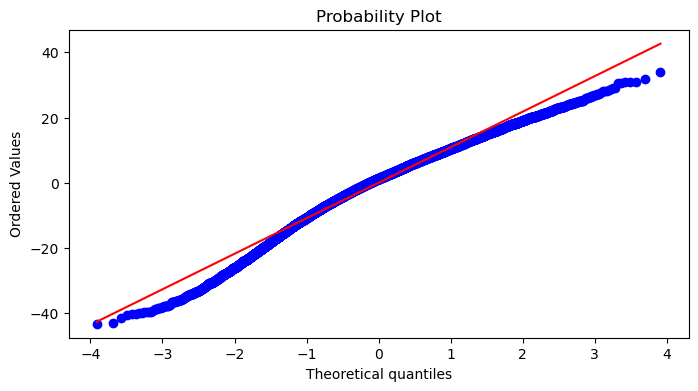

In [51]:
plt.figure(figsize=(8, 4))

probplot(results.resid, dist='norm', plot=plt)  #QQplot
plt.show()

In [52]:
X_user = data_clean_dummies['user_review']
X_ano = data_clean_dummies['ano']
X_nint = data_clean_dummies['empresa_Nintendo']
X_pc = data_clean_dummies['empresa_PC']
X_ps = data_clean_dummies['empresa_PlayStation']
X_xbox = data_clean_dummies['empresa_Xbox']

from statsmodels.formula.api import ols


#fit multiple linear regression model
model = ols('Y ~ X_user + X_ano + X_nint + X_pc + X_ps + X_xbox', data=X).fit()

#view model summary
print(model.summary())


from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     742.8
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:59:08   Log-Likelihood:                -57420.
No. Observations:               15040   AIC:                         1.149e+05
Df Residuals:                   15034   BIC:                         1.149e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -368.7191     23.520    -15.677      0.0

1.9842389417511213

<Figure size 1000x600 with 0 Axes>

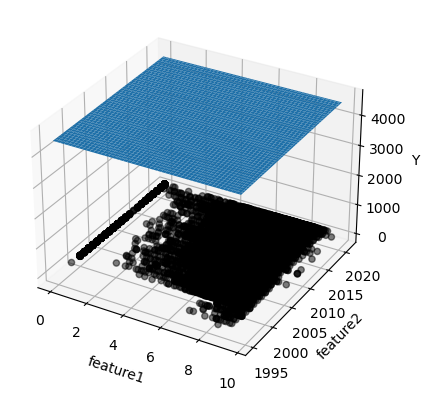

In [53]:

# Recupera os parâmetros calculados
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # meta
beta2_hat = results.params[2]  # 

# Define uma função que aplica aos parâmetros
def f (feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X['user_review']
feature2 = X['ano']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

# Plota os pontos e o plano em 3D
plt.figure(figsize=(10, 6))
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="black", alpha=0.5)
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

In [54]:
data_clean.meta_score.min()

20

In [66]:
# x_vec_2 = np.linspace(data_clean.meta_score.min(), data_clean.meta_score.max(), 2)
# y_vec_2 = beta0_final + beta1_final*x_vec_2

# plt.figure(figsize=(7,6))
# plt.plot(x_vec_2,y_vec_2, color="r") # resultados da regressão
# plt.scatter(data_clean['ano'], y_dados); # dados
# plt.xlabel("x: ano")
# plt.ylabel("y: meta_score")
# plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
# plt.show()

In [67]:
R2 = np.square(np.subtract(Y, resultados)).mean()
RMS = math.sqrt(R2)
RMS

11.010528212350989

In [68]:
r2 = 1 - (sum((data_clean_dummies['meta_score']- resultados)**2)/sum((data_clean_dummies['meta_score']-
                                                               (data_clean_dummies['meta_score'].mean()))**2))
rMS = math.sqrt(r2)
rMS

0.44508422321506885

In [69]:
len(resultados)

15040

In [70]:
len(data_clean_dummies['meta_score'])

15040

In [71]:
1 - sum((data_clean_dummies['meta_score'] - resultados)**2)/sum((data_clean_dummies['meta_score']-
                                                               data_clean_dummies['meta_score'].mean())**2)

0.19809996575496125

## RANDOM FOREST REGRESSION

In [72]:
# X_1 = data_clean[['ano', 'user_review']] 
# Y_1 = data_clean['meta_score']

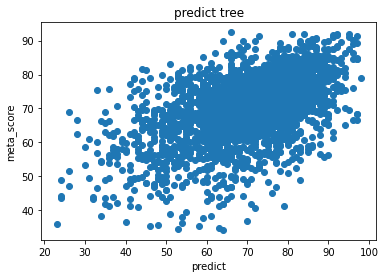

0.22345306012016586


In [74]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

RRG = RandomForestRegressor()
RRG = RRG.fit(X1_train, y1_train)

predY = RRG.predict(X1_test)
r_tree = metrics.r2_score(y1_test, predY)

plt.figure()
plt.ylabel('meta_score')
plt.xlabel('Predict')
plt.title('Predict Pree')
plt.scatter(y1_test, predY)
plt.show()

print(r_tree)